In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
lending_data.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data.loan_status

# Separate the X variable, the features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']
X = lending_data.loc[:, features]

In [5]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [6]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression()

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression()

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = lr.predict(X_test)
probability = lr.predict_proba(X_test)[:, 1]

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

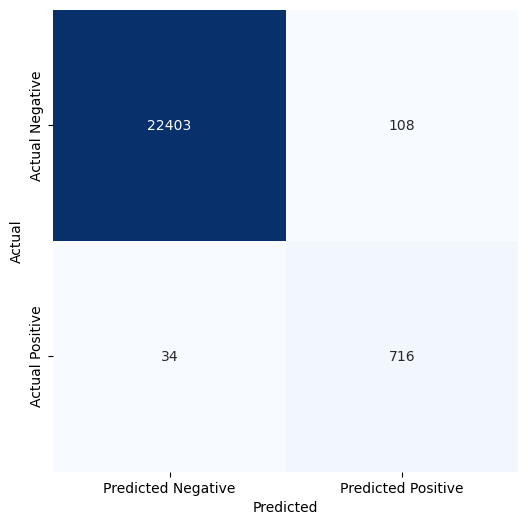

In [10]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, predictions)

# Seaborne Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
# Print the classification report for the model
class_report = classification_report(y_test, predictions)

print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22511
           1       0.87      0.95      0.91       750

    accuracy                           0.99     23261
   macro avg       0.93      0.97      0.95     23261
weighted avg       0.99      0.99      0.99     23261



### Step 4: Answer the following question.

## Overview of the Analysis

The purpose of this analysis is to predict whether a loan would be classified as high risk, represented as (1), or a healthy loan, represented as (0).
The supplied database provides information about the key metrics of the loans that we used in our prediction model. To reach our Logistic Regression 
Model, we first needed to prepare the data for processing, visualize the model, and evaluate the results.

## Results

* **Machine Learning - Logistic Regression Model:**
    
  * **Accuracy (0.99):** Indicates that the model was mostly correct in predicting high-risk or healthy loans.
  * **Precision (1.00 and 0.87):** Indicates 1.00 precision for healthy loans and 0.87 for high risk. The model is very good at predicting healthy loans and slightly less accurate at predicting high-risk loans.
  * **Recall (1.00 and 0.95):** Indicates 1.00 for healthy and 0.95 for high risk. The model is very good at predicting healthy loans as healthy, but some high-risk loans were classified as healthy loans.

## Summary

The model has a high degree of accuracy, precision, and recall, so it performs well in classifying healthy loans but less so with high-risk loans. Given the nature of the industry and the information available, additional data should be obtained to help the model perform better, or additional models should be tested to see if they might perform better.

---